# K Mean Clustering 

### Import the libraries

In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
from PIL import Image
from IPython.display import display, HTML

### Sapmle Input Data vizualization

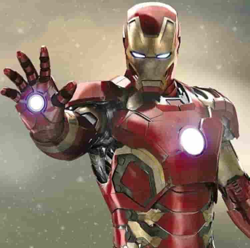

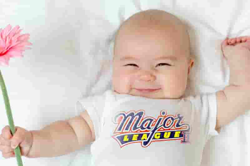

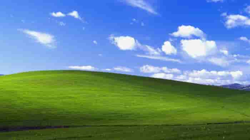

In [2]:
image_filenames = ['1.jpg', '2.jpg', '3.jpg']

# Open and display each image
for filename in image_filenames:
    # Open the image using PIL
    image = Image.open(filename)

    # Define the desired width for the resized image
    desired_width = 250

    # Calculate the new height while maintaining the aspect ratio
    aspect_ratio = float(image.size[1]) / float(image.size[0])
    desired_height = int(aspect_ratio * desired_width)

    # Resize the image
    resized_image = image.resize((desired_width, desired_height))

    # Display the resized image
    display(resized_image)


### Read the images

In [3]:
#________________This code is for getting information of images(No editing needed)_______________________

def resize_image(image, width):
    aspect_ratio = float(width) / image.shape[1]
    height = int(image.shape[0] * aspect_ratio)
    resized_image = cv.resize(image, (width, height))
    return resized_image

input_img_1_info = cv.imread('1.jpg')
input_img_2_info = cv.imread('2.jpg')
input_img_3_info = cv.imread('3.jpg')

#Converting BGR to RGB(OpenCV uses BGR format by default)__You can skip this step if you are using PIL to load images
input_img_1 = cv.cvtColor(input_img_1_info, cv.COLOR_BGR2RGB)
input_img_2 = cv.cvtColor(input_img_2_info, cv.COLOR_BGR2RGB)
input_img_3 = cv.cvtColor(input_img_3_info, cv.COLOR_BGR2RGB)


#______________RESIZE IMAGES HERE IF NEEDED_______________________
scaling_factor = 0.3
# Adjust this value to change the size of the shrunk images
#your code here depending on the library you are using
resized_img_1 = resize_image(input_img_1, 250)
resized_img_2 = resize_image(input_img_2, 250)
resized_img_3 = resize_image(input_img_3, 250)


#______________RESIZE IMAGES HERE IF NEEDED_______________________

#Information of images
print("shapes of images:")
print('Image 1: ', input_img_1_info.shape)
print('Image 2: ', input_img_2_info.shape)
print('Image 3: ', input_img_3_info.shape)

#__________You can use PIL to load images which use RGB format by default_____________________
# BUT you wont be able to get information of images as given by cv2
 
# input_img_1 = Image.open('1.jpg')
# input_img_2 = Image.open('2.jpg')
# input_img_3 = Image.open('3.jpg')
# print("sizes of images:")
# print('Image 1: ', input_img_1.size)
# print('Image 2: ', input_img_2.size)
# print('Image 3: ', input_img_3.size)

# def resize_images(image, width):
#     aspect_ratio = float(image.size[1]) / float(image.size[0])
#     desired_height = int(aspect_ratio * width)
#     resized_image = image.resize((width, desired_height))
#     return resized_image

# resized_image_1 = resize_images(input_img_1, 250)
# resized_image_2 = resize_images(input_img_2, 250)
# resized_image_3 = resize_images(input_img_3, 250)







shapes of images:
Image 1:  (744, 750, 3)
Image 2:  (533, 800, 3)
Image 3:  (393, 700, 3)


Expexted Output: <br>
shapes of images: <br>
Image 1:  (744, 750, 3) <br>
Image 2:  (533, 800, 3)<br>
Image 3:  (393, 700, 3)

### Understanding the data

In [4]:
#printing the first row of the image
print("Image 1 : ROW1:")
print(input_img_1_info[0].shape)
print(input_img_1_info[0])
type(input_img_1_info)

Image 1 : ROW1:
(750, 3)
[[145 167 178]
 [145 167 178]
 [145 167 178]
 ...
 [ 96 115  98]
 [ 96 115  98]
 [ 96 115  98]]


numpy.ndarray

### Preprocessing the data

In [5]:
#_____________You will need this piece of code if you are using PIL to load images_____________________
# Cuz Cv2 make use of numpy array to store images and PIL uses Image object to store images

# input_img_1 = np.array(input_img_1)
# print(f"input_img_1.shape: {input_img_1.shape}")

# input_img_2 = np.array(input_img_2)
# print(f"input_img_2.shape: {input_img_2.shape}")

# input_img_3 = np.array(input_img_3)
# print(f"input_img_3.shape: {input_img_3.shape}")



In [6]:
#_________________This code will need your attention to run properly____________

#convert the image1 to 2D array
input_img_1_2d =np.reshape(input_img_1_info, (-1, 3))
print("Image 1 : 2D array:", input_img_1_2d.shape)

#convert the image 2 to 2D array
input_img_2_2d = np.reshape(input_img_2_info, (-1, 3))
print("Image 2 : 2D array:", input_img_2_2d.shape)

#convert the image 3 to 2D array
input_img_3_2d = np.reshape(input_img_3_info, (-1, 3))
print("Image 3 : 2D array : ", input_img_3_2d.shape)



Image 1 : 2D array: (558000, 3)
Image 2 : 2D array: (426400, 3)
Image 3 : 2D array :  (275100, 3)


##### Expected Output

Image 1 : 2D array:
(558000, 3) <br>
Image 2 : 2D array:
(426400, 3) <br>
Image 3 : 2D array:
(275100, 3) <br>

### Implimentation of K-Mean Clustering

#### Helper Funtions

In [22]:
#your code here
# Code Implimentation of K-means clustering algorithm
# 1. Randomly select K points as centroids from dataset
# 2. Assign each data point to the closest centroid
# 3. Recompute the centroids of newly formed clusters
# 4. Repeat steps 2 and 3 until convergence occurs

def random_centroids(data, k):
    random_indices = np.random.choice(range(data.shape[0]), size=k, replace=False)
    centroids = data[random_indices]
    return centroids





In [21]:
#your code here
def find_closest_centroids(data, centroids): 
    distances = np.abs(data[:, np.newaxis] - centroids).sum(axis=2)
    labels = np.argmin(distances, axis=1)
    return labels




In [15]:
#your code here

def update_centroids(data, idx, K):
      centroids = np.zeros((K, data.shape[1]))  # Initialize centroids with zeros

      for i in range(K):
            if np.sum(idx == i) > 0:
                  centroids[i] = np.mean(data[idx == i], axis=0)

      return centroids





#### Mian Function

In [10]:
#_________________This code will need your attention to run properly____________
#your code here

def kmeans_clustering(data, k, max_iterations=100):
        
    # Randomly initialize centroids
    #call the helper function here of random_centroids_initializer
    centroids = random_centroids(data, k)

    for _ in range(max_iterations):

        # Assign each data point to the nearest centroid
        #call the helper function here of assign_data_points_to_nearest_centroid
        labels = find_closest_centroids(data, centroids)

        # Update centroids by taking the mean of the assigned data points
        #call the helper function here of update_centroids_by_Manhattan_distance(absolute distance)
        centroids = update_centroids(data, labels, k)
        
        # Check convergence


    #Upadte centroids to the latest centroids

    return labels, centroids



#### Verification of the output

In [28]:
# chanage the value of to match your output with given output
resized_img_1_2d = resized_img_1.reshape((-1, 3))
resized_img_2_2d = resized_img_2.reshape((-1, 3))
resized_img_3_2d = resized_img_3.reshape((-1, 3))
k = 2

# Code was tested with max_iterations = 1 becuase it was taking too long to run
labels, centroids = kmeans_clustering(resized_img_1_2d, k)
print('k', k)
print('unique labels',np.unique(labels))
print('Labels shape: ', labels.shape)
print('Centroids shape: ', centroids.shape)
print('centroids',centroids)

k 2
unique labels [0 1]
Labels shape:  (62000,)
Centroids shape:  (2, 3)
centroids [[178.52193817 165.1769025  146.62229489]
 [ 95.21932299  67.58815233  59.48060649]]


#### Expected Output
Note : The output will vary if you use diffrent distance metric or reduced size of the image.

For input_image_1: <br>
<hr>

- k 2
- unique labels [0 1]
- Labels shape:  (558000,)
- Centroids shape:  (2, 3)
> [[ 98.15321625  72.44336854  63.15206393] <br>
      [182.32910336 168.23132632 150.00980018]]
<hr>

For input_image_2: <br>

- k 2
- unique labels [0 1]
- Labels shape:  (426400,)
- Centroids shape:  (2, 3)
> centroids [[226.34647018 223.46249381 220.90380275] <br>
 [193.99718075 161.61216588 146.87529588]]

 <hr>
 For input_image_1: <br>

- k 2
- unique labels [0 1]
- Labels shape:  (275100,)
- Centroids shape:  (2, 3)
> centroids [[118.32229891 158.51120919 238.83084683] <br>
      [ 79.00552162 107.03481755  28.29886674]]

## BATCH RUN

### K-Mean Clustering on the all images

NOTE: IF YOUR CODE IS TAKING TOO MUCH TIME TO RUN, TRY RESIZE THE IMAGE TO SMALLER SIZE 

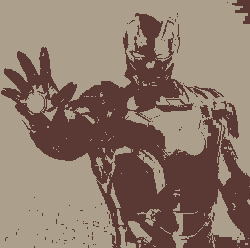

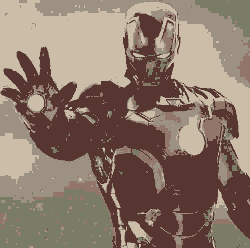

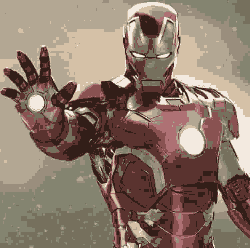

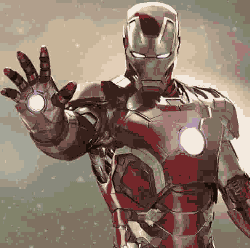

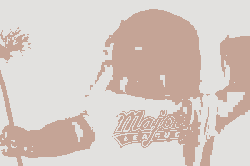

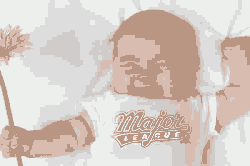

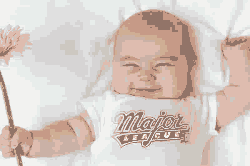

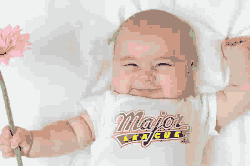

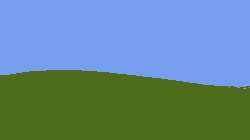

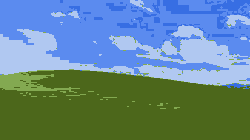

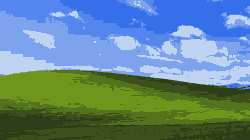

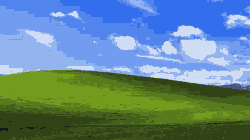

In [26]:


k_values = [2, 5, 10,20]
images = [resized_img_1_2d, resized_img_2_2d, resized_img_3_2d]
org_images = [resized_img_1, resized_img_2, resized_img_3]

for i, (image, org_image) in enumerate(zip(images, org_images)):
    for k in k_values:
        labels, centroids = kmeans_clustering(image, k, 2)
        # Replace pixel values with centroid values
        new_image_data = centroids[labels].reshape(org_image.shape)
        # Convert the data back to image format
        new_image = Image.fromarray(new_image_data.astype(np.uint8))
        # Display the new image
        display(HTML(f'<h2>Clustered Image of input {i+1} (k={k})</h2>'))
        display(new_image)


### Expected Output


![Example Image](1.O.jpg)
![Example Image](2.O.jpg)
![Example Image](3.O.jpg)
